In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
from dateutil.parser import parse
from datetime import date
import calendar
from scipy import stats
sns.set_context('paper', font_scale=1.4)

### Study Limitations

Before starting the report, I would like to mention some of the limitations which made me to shift my goals during the study as following:
<br>
1- Not having enough information about the dataset and business logic of the numeric columns made it very difficult for us to match our goal to the initially agreed goal with the partner which was to find ways to reduce foodwaste in the supply chain.
<br>
2- The dataset which was given to us was for only one month and this prevented us to see meaningful trends and extract useful insights.
<br>
3- The column daily_stock_in_euros missed some important information such as restock. Also,it was measured everyday although the department store is closed on Sundays. Moreover, there were some anomalies in this column which made it impossible to use for analyses.
<br>
4- The amount of NAN values in daily_shrinkage_in_euros was so high that made the statistical analyses hardly applicable to it. 
<br>
As a result, I have focused on my personal goals which is learning data science deeply rather than reaching to a business outcome for the Metronom company out of this project.

### Abstract

The data analysis in this report has been done on one of Metro's department store data for the month january 2020. Due to the limitations of the study, the ultimate goal of this report is not to reach to significant statistical results but to give a fair and true view about the dataset we received.
<br>
However, I have tried to focus on exploring the  daily sales in different main product categories to figure out trends and distributions and if possible to find a correlation between sales and shrinkage data. The data science libraries such as Pandas, Seaborn, Matplotlib and statistical concepts such as linear correlation & probability distributions have helped me a lot in analysing the data and visualizing the results.
<br>
Since we lack sufficient data for shrinkage, a linear correlation could not be derived from the shrinkage and sales data. Moreover, shrinkage values are not derived by an automated process and huge errors can be find in its measurement. Hence, from the trend analysis it can be predicted that the sales go down on Fridays and increase on Mondays in the following weeks because the sales line has troughs & peaks on a regular basis.In addition, it can be seen that Fridays have the highest and Mondays have the least amount of shrinkage in euros.
<br>
Considering the fact that real data have extreme values, statistical analyses show us that all of the main product group categories are positively skewed to the right. Also, the spreads of the data in categories such as ACM FLEISCH (meat) & ACM FRISCHFISCH (fresh fish) represent that their sales values vary more than other categories such as ACM BACKWAREN (bakery products) which has the least variation in its sales price.
In fact, these information can be the building blocks of further analyses on sales and shrinkage in the company to predit a better sales strategy and improve decision makings to decrease foodwaste. 
<br>

### Introduction

Data analysis in retail businesses has a crucial role and it covers areas from sales and inventory to customer data. It gives the companies the ability to effectively track customer actions,their purchases, foot traffic in their stores and shrinkage management to be more profitable. In fact, getting the stated knowledge requires having data from different parts of the business which is not possible for me to have in this project. However, the focus of this study is to go deep into the main product categories daily sales in euros to get some insights about the sales patterns of products and to determine whether criteria such as weekdays and freshness have effects on the sales or not . Further, it has been tried to find some correlations between daily sales and shrinkage in euros to understand whether the two variables can have effects on each other or not. 
<br>
The analyses start with cleaning the data followed by exploratory and statistical analyses and end with important results and conclusion. 


### Methods

Data science libraries and documentations such as pandas, seaborn, matplotlib and statistical concepts & principles have been the most frequent methods used for analysing this dataset. 

### 1. Data Handling

#### 1.1  General information about the dataset

The most important step before getting started with data analysis is to understand the dataset. I have started with loading and cleaning of the dataset for my further analysis. The provided dataset, needs some preprocessing to get into a format that can be used by different libraries.
<br>
This dataset:
<br>
1) Has a lot of useless data that cannot help us in any stages of the analyses.
<br>
2) Has a lot of NaN and 0 values in most important columns.
<br>
3) Has some data which are invalid.
<br>
4) Needs some changes in data types of some columns to become compatible with codes written.

#### 1.2 Loading and Pre-processing dataset

Let's load the data to see what kind of preprocessing we need.

In [2]:
df= pd.read_csv('./Code data_METRONOM.csv',sep='\t', encoding='windows-1252')
df.head()

,store_id,store_desc,CATMAN_BUY_DOMAIN_ID,CATMAN_BUY_DOMAIN_DESC,PCG_MAIN_CAT_ID,PCG_CAT_ID,PCG_CAT_DESC,PCG_SUB_CAT_ID,PCG_SUB_CAT_DESC,ART_NO,ART_NAME,Bv NNEK,Bv Stk,Bestand Ist NNEK,Bestand Ist Stück,WA Stück,Umsatz VK Netto,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


#### 1.3 Renaming the columns

Let's rename the columns' names for a better and easy understanding.

In [3]:
df1= df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "purchasing_area_id","CATMAN_BUY_DOMAIN_DESC": "main_product_category",
                   "PCG_MAIN_CAT_ID": "main_product_group_id","PCG_CAT_ID": "product_group_category_id",
                  "PCG_CAT_DESC": "product_group_category_description","PCG_SUB_CAT_ID": "product_subgroup_category_id",
                  "PCG_SUB_CAT_DESC":"product_subgroup_category_description","Bv NNEK": "daily_shrinkage_in_euros",
                   "Bv Stk":"daily_shrinkage_in_pieces","WA Stück":"daily_sales_in_pieces","Umsatz VK Netto":"daily_sales_in_euros",
                               "Bestand Ist NNEK": "daily_stock_in_euros", "Bestand Ist Stück":"daily_stock_in_pieces"})
df1.head()

,store_id,store_desc,purchasing_area_id,main_product_category,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


### 2. Data Wrangling

Let's figure out what kind of information this dataset has regarding the columns names ,data types and the values of each row.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738671 entries, 0 to 738670
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   store_id                               738671 non-null  int64  
 1   store_desc                             738671 non-null  object 
 2   purchasing_area_id                     738671 non-null  int64  
 3   main_product_category                  738671 non-null  object 
 4   main_product_group_id                  738671 non-null  int64  
 5   product_group_category_id              738671 non-null  int64  
 6   product_group_category_description     738671 non-null  object 
 7   product_subgroup_category_id           738671 non-null  int64  
 8   product_subgroup_category_description  738671 non-null  object 
 9   ART_NO                                 738671 non-null  int64  
 10  ART_NAME                               738671 non-null  

#### 2.1 Creating Weekday Column

Let's extract weekdays from date_of_day column. Before that we need to change this column data type from object to datetime.

In [5]:
df1['date_of_day']=pd.to_datetime(df1['date_of_day'], format='%d.%m.%y')

In [6]:
df1['weekday_number'] = df1['date_of_day'].dt.dayofweek
df1['weekday'] = df1['weekday_number'].apply(lambda x: calendar.day_name[x])

#### 2.2 Dropping Unnecessary Columns

There are 21 columns in dataset and 11 of them are not going to be used at all. Let's drop them.

In [7]:
df1.drop(['store_id', 'store_desc', 'DAY_DESC','store_desc',                                       
'purchasing_area_id', 'product_group_category_id', 'product_subgroup_category_id',
          'main_product_group_id','product_group_category_description',
          'product_subgroup_category_description', 'ART_NO', 'ART_NAME','weekday_number'], axis =1 , inplace = True)
df1.head()

,main_product_category,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,weekday
0,ACM MOLKEREIPRODUKTE,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-01,Wednesday
1,ACM MOLKEREIPRODUKTE,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-02,Thursday
2,ACM MOLKEREIPRODUKTE,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-03,Friday
3,ACM MOLKEREIPRODUKTE,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-04,Saturday
4,ACM MOLKEREIPRODUKTE,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-05,Sunday


#### 2.3 Datatype Conversion

As can be seen in the dataframe information above, there are some columns that have uncompatible datatypes as object such as "main_product_category" & "daily_shrinkage_in_euros",... which I want to use later for my analysis and they have to be changed to proper datatypes. The below codes will do the conversions.

In [8]:
df1["daily_shrinkage_in_euros"].replace(',','.',inplace = True, regex = True)

In [9]:
df1[['daily_shrinkage_in_euros']] = df1 [['daily_shrinkage_in_euros']].apply(pd.to_numeric)

In [10]:
for col in ['main_product_category','weekday']:
    df1[col] = df1[col].astype('category')
df1.dtypes

main_product_category              category
daily_shrinkage_in_euros            float64
daily_shrinkage_in_pieces           float64
daily_stock_in_euros                float64
daily_stock_in_pieces               float64
daily_sales_in_pieces               float64
daily_sales_in_euros                float64
date_of_day                  datetime64[ns]
weekday                            category
dtype: object

#### 2.4 Summary of Columns

Here is the summary of the most important columns:


<b>main_product_category= </b> We have 11 main product categories : ACM BACKWAREN, ACM BLUMEN, ACM FEINKOST, ACM FLEISCH, ACM FRISCHFISCH, ACM GEMUESE, ACM GOURVENIENCE, ACM KAESE, ACM MOLKEREIPRODUKTE, ACM OBST, ACM WURST
<br>
<b>daily_shrinkage_in_euros / pieces= </b> The amount of food wasted in euros / pieces
<br>
<b>daily_stock_in_euros / pieces= </b> Stock level in euros / pieces without restock information
<br>
<b>daily_sales_in_Pieces / euros= </b> The amount of sales in pieces/ euros
<br>
<b>date_of_day= </b> The date which the info was recorded
<br>
<b>weekday= </b> Day of the week that info was recorded
<br>

#### 2.5 Treating invalid data

Some of the invalid information which exist in this data set are positive values for shrinkage and negative values for sales. According to the experts at Metronom, these invalid data should be dropped out from our data frame because they don't have a meaning and they are incorrect. Let's drop these invalid rows.

In [11]:
positive_shrinkage = df1[df1["daily_shrinkage_in_euros"] > 0]

Let's drop rows with positive shrinkage as below:

In [12]:
df1.drop(df1[df1["daily_shrinkage_in_euros"] > 0].index, inplace = True) 

Also, Let's figure out the number of rows with negative values for sales and drop them.

In [13]:
negative_sales = df1[df1["daily_sales_in_euros"] < 0]

In [14]:
df1.drop(df1[df1["daily_sales_in_euros"] < 0].index, inplace = True) 

#### 2.6 Dealing with NAN and 0 values

Let's do some exploration with the amount of NAN values in the dataset.

In [15]:
df1.isnull().sum().sort_values(ascending = False)

daily_shrinkage_in_pieces    737982
daily_shrinkage_in_euros     737982
daily_sales_in_euros         724591
daily_sales_in_pieces        724591
weekday                           0
date_of_day                       0
daily_stock_in_pieces             0
daily_stock_in_euros              0
main_product_category             0
dtype: int64

Since the amount of NAN values are very high in this dataset, removing them will bias our results a lot. I have made some scenarios to see in which combination we lose least amount of data.

#### What if I drop all NAN from columns with quantitative data?

In [16]:
df1.dropna(subset=['daily_stock_in_euros', 'daily_stock_in_pieces',
                   'daily_sales_in_euros','daily_shrinkage_in_pieces',
                   'daily_shrinkage_in_euros','daily_sales_in_pieces'],
           how='any').shape

(262, 9)

As shown above we will loose a lot of data if we drop all the rows which have NAN in any of their values and this will affect our analyses.

Let's play with NANful columns to reach to an optimum set of data which has the least amount of invalid data.

In [17]:
df1.dropna(subset=['daily_sales_in_euros'], how='any').shape

(13979, 9)

In [18]:
df1.dropna(subset=['daily_shrinkage_in_euros'], how='any').shape

(588, 9)

Now , I will combine two columns to check how many rows I will loose.

In [19]:
df1.dropna(subset=['daily_shrinkage_in_euros','daily_sales_in_euros'], how='any').shape

(262, 9)

The dataset above can be very ideal but since I am working with a small dataset, dropping NAN from all those columns are very dangerous.

Let's drop rows only if all its values for respective columns are missing.

In [20]:
df1.dropna(subset=['daily_shrinkage_in_euros','daily_sales_in_euros', 
                   'daily_shrinkage_in_pieces', 'daily_sales_in_pieces'], how='all').shape

(14305, 9)

It seems if I drop NAN like in the combination above, I won't lose that much rows. Therefore, I will continue my analyses in this scale.

#### 2.7 Is it possible to infer missing values from other available values?

One of the ways to get the missing values is to infer their values by other known values.
I decided to deep dive into different products in various categories to see if it is possible to infer and estimate the missing values from the existing ones or not.

In [21]:
gdf = df1.groupby("main_product_category")["daily_sales_in_euros"]
def countna(x):
    return (x.isna()).sum()
gdf.agg(['count', countna, 'size'])

,count,countna,size
main_product_category,,,
ACM BACKWAREN,717,33816.0,34533
ACM BLUMEN,0,148366.0,148366
ACM FEINKOST,714,28513.0,29227
ACM FLEISCH,1112,96671.0,97783
ACM FRISCHFISCH,359,94792.0,95151
ACM GEMUESE,2744,117982.0,120726
ACM GOURVENIENCE,41,7709.0,7750
ACM KAESE,2547,35505.0,38052
ACM MOLKEREIPRODUKTE,2744,40245.0,42989


<b>Table1:</b> Counting the NAN values in main product categories

As can be seen above, the amount of NAN for specific products sales is too many that an estimation or inference from the exisiting values without any domain knowledge is impossible. Actually, our unknown knowledge is so much higher than the available information that an estimation here will bias the results. Therefore, I have decided to do my explorations based on the main product categories.

In [22]:
df2= df1.dropna(subset=['daily_shrinkage_in_euros','daily_sales_in_euros', 
                   'daily_shrinkage_in_pieces','daily_sales_in_pieces'], how='all')

According to the experts at Metronom, the NAN values can be replaced by 0 because NAN for sales & shrinkage mean 0 sales or shrinkage have been recorded for the respective items at that day. Therefore, the NAN values in the numeric columns can be replaced by 0.

In [23]:
df2['daily_sales_in_euros'] = df2['daily_sales_in_euros'].fillna(0)
df2['daily_shrinkage_in_euros'] = df2['daily_shrinkage_in_euros'].fillna(0)
df2['daily_sales_in_pieces'] = df2['daily_sales_in_pieces'].fillna(0)
df2['daily_shrinkage_in_pieces'] = df2['daily_shrinkage_in_pieces'].fillna(0)

#### 2.8 Introducing a new categorical column called "Freshness"

This dataset is mostly related to the fresh products at the department store but according to Metronom, the fresh products can be divided into "fresh" and "ultrafresh" categories. Given the information by Metronom, the categories of FLEISCH, FRISCHFISCH, GEMUESE, BLUMEN & OBST can be categorised as "Ultrafresh" and the rest as "Fresh" as below.

In [24]:
df2['freshness'] = 'fresh'
df2['freshness'][df2['main_product_category'] == 'ACM FLEISCH'] = 'ultrafresh'
df2['freshness'][df2['main_product_category'] == 'ACM FRISCHFISCH'] = 'ultrafresh'
df2['freshness'][df2['main_product_category'] == 'ACM GEMUESE'] = 'ultrafresh'
df2['freshness'][df2['main_product_category'] == 'ACM BLUMEN'] = 'ultrafresh'
df2['freshness'][df2['main_product_category'] == 'ACM OBST'] = 'ultrafresh'
df2.head()

,main_product_category,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,weekday,freshness
3033,ACM FLEISCH,0.0,0.0,915.0,0.0,0.0,144.000,2020-01-27,Monday,ultrafresh
3034,ACM FLEISCH,0.0,0.0,346.0,0.0,0.0,605.000,2020-01-28,Tuesday,ultrafresh
3035,ACM FLEISCH,0.0,0.0,771.0,0.0,0.0,1.523,2020-01-29,Wednesday,ultrafresh
3036,ACM FLEISCH,0.0,0.0,138.0,0.0,0.0,673.000,2020-01-30,Thursday,ultrafresh
3037,ACM FLEISCH,0.0,0.0,143.0,0.0,0.0,146.000,2020-01-31,Friday,ultrafresh


### 3.Data Exploration

#### 3.1 Data Visualisation

I will start the data exploratory analyses by giving some describtive information about the dataset. Let's have an overview of the sales and shrinkage values grouped by freshness criterion.

In [25]:
df2.groupby(["freshness"])[["daily_shrinkage_in_euros","daily_sales_in_euros"]].sum()

,daily_shrinkage_in_euros,daily_sales_in_euros
freshness,,
fresh,-16797.2265,394066.109
ultrafresh,-6034.9998,309183.872


<b>Table2:</b> Total daily sales and shrinkage in euros grouped by freshness criterion

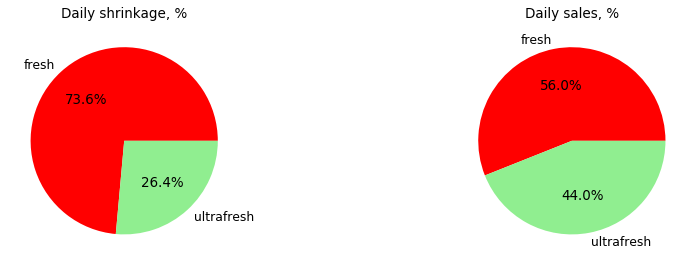

In [26]:
df_pie = pd.DataFrame({'fresh':[16797.2265,394066.109],
               'ultrafresh':[6034.9998,309183.872],
               }, index=['daily_shrinkage_in_euros','daily_sales_in_euros'])    
fig, axs = plt.subplots(nrows=1, ncols=df_pie.index.size, figsize=(10,13))
colors = ["red","lightgreen"]
fig.subplots_adjust(left=-0.5, right=0.6, bottom=0.6, top=0.85, wspace=0.3, hspace=0)
title= ['Daily shrinkage, %','Daily sales, %']
for row in range(df_pie.index.size):
    fig.add_subplot(axs[row])
    plt.pie(df_pie.loc[df_pie.index[row],:], labels=df_pie.columns,labeldistance=1.1, autopct="%1.1f%%", colors=colors)
    axs[row].set_title(title[row])

<b>Figure1: </b> The proportion of fresh and ultrafresh products in total daily shrinkage and sales in euros 

As Figure1 shows, fresh products have more shares in total amount of shrinkage & sales than ultrafresh ones.

#### 3.2 Trend Analysis

Trend analysis is one of the technical ways of predicting the future movement of any measurement. Figure2 shows the fluctuations of daily shrinkage & sales in euros during the month January 2020. As can be seen in the line graph, the sales trend has troughs & peaks on a regular basis. Therefore, regardless of the amounts, it has a seasonal and slightly positive trend. It can be predicted that the sales go down on Fridays and increas on Mondays in the following weeks.

According to Metronom expert, retail shrinkage can be defined as the value of inventory (including cash) that is lost through theft or through fraud by staff, customers, suppliers or through administrative error. This implies that shrinkage values are not derived by an automated process and huge errors can be find in its measurement. 
<br>
As can be seen below, no specific trend can be seen in shrinkage. Also, finding no trend may mean there is no trend, but it may just as likely mean that our data is insufficient to illuminate a trend which does in fact exist.
 

I have extracted a new data frame out of the main one for plotting the trends as below:

In [27]:
df2_date= df2.groupby(pd.Grouper(key='date_of_day',freq='d'))['daily_shrinkage_in_euros', 'daily_sales_in_euros'].apply(sum)
new_df = df2_date[df2_date.loc[:]!=0].dropna()
new_df.head()

,daily_shrinkage_in_euros,daily_sales_in_euros
date_of_day,,
2020-01-02,-925.6620,32879.077
2020-01-03,-4435.6768,31093.260
2020-01-06,-1797.9962,38821.733
2020-01-07,-1708.7863,26127.230
2020-01-08,-839.8867,30303.453


<b>Table3:</b> Daily shrinkage and sales in euros in January 2020

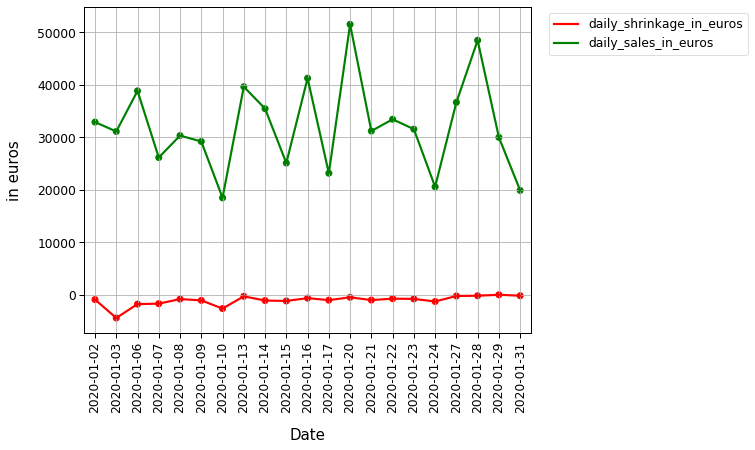

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x=new_df.index,y='daily_shrinkage_in_euros',data=new_df,color='red')
sns.pointplot( x=new_df.index, y='daily_sales_in_euros',data=new_df,color='green',alpha=0.8, rot=90)
plt.xlabel('Date',fontsize = 15,color='black',labelpad=15)
plt.ylabel('in euros',fontsize = 15,color='black',labelpad=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(handles=ax.lines[::len(new_df)+1], labels=["daily_shrinkage_in_euros","daily_sales_in_euros"],
bbox_to_anchor=(1.5,1), loc="upper right")
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(new_df.index.to_series().dt.strftime("%Y-%m-%d")))
plt.grid()

<b>Figure2: </b> Daily shrinkage and sales in euros trend during the month January 2020

#### 3.3 Weekdays Sales & Shrinkage Analysis

As can be seen in Figure3, there is no shrinkage & sales on weekends. Also, most of the sales happen on Monday & Thursday while Friday has the least amount of sale. 

In [29]:
df2_weekday= df2.groupby('weekday')['daily_shrinkage_in_euros', 'daily_sales_in_euros'].apply(sum)
df2_weekdays = df2_weekday[df2_weekday.loc[:]!=0].dropna()
df2_weekdays

,daily_shrinkage_in_euros,daily_sales_in_euros
weekday,,
Friday,-9617.0413,113097.963
Monday,-2863.1071,166579.502
Thursday,-3477.4796,163614.560
Tuesday,-4054.3495,141190.966
Wednesday,-2819.0344,118766.990


<b>Table4:</b> Daily shrinkage and sales in euros by weekdays

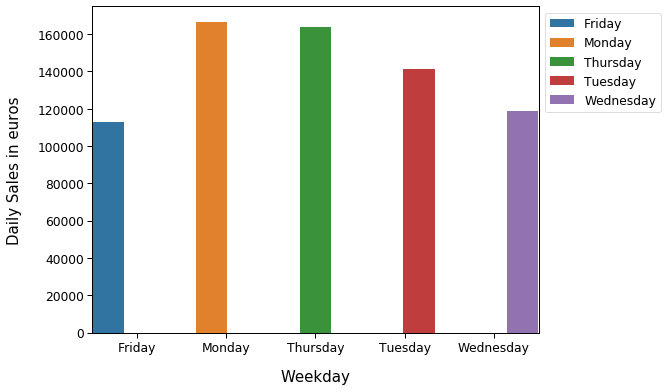

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax= sns.barplot(data = df2_weekdays.reset_index(), x = 'weekday', y ='daily_sales_in_euros',
                hue='weekday', linewidth=10.5)
plt.xlabel('Weekday',fontsize = 15,color='black',labelpad=15)
plt.ylabel('Daily Sales in euros',fontsize = 15,color='black',labelpad=15)
plt.legend(bbox_to_anchor=(1, 1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .35)
plt.show()

<b>Figure3: </b> Total daily sales in euros of different days of the week

Also, Figure 4 reveals that Friday has the most amount of shrinkage in euros.

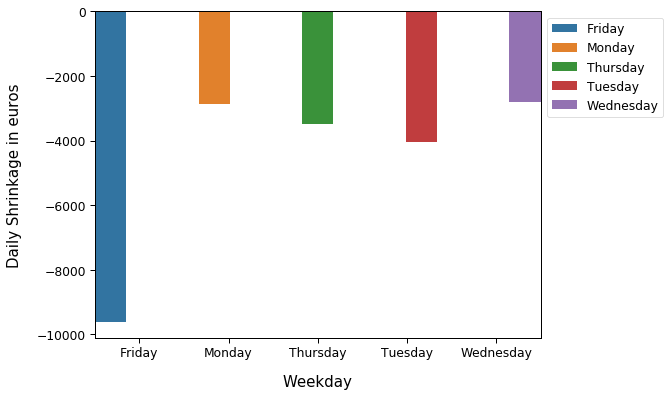

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax= sns.barplot(data = df2_weekdays.reset_index(), x = 'weekday', y ='daily_shrinkage_in_euros',
                hue='weekday', linewidth=10.5)
plt.xlabel('Weekday',fontsize = 15,color='black',labelpad=15)
plt.ylabel('Daily Shrinkage in euros',fontsize = 15,color='black',labelpad=15)
plt.legend(bbox_to_anchor=(1, 1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .35)
plt.show()

<b>Figure4: </b> Total daily shrinkage in euros of different days of the week

### 4.Statistical Analysis

Since the focus of the research is on exploring the sales and shrinkage pattern, the statistical analyses have been made on these two columns to interprete them and if possible finding some correlation between these two variables.
<br>
Let's have an overview of the statistical information of these two columns first.

In [32]:
df2.drop(['daily_shrinkage_in_pieces','daily_sales_in_pieces','daily_stock_in_pieces','daily_stock_in_euros'], axis= 1).describe().T

,count,mean,std,min,25%,50%,75%,max
daily_shrinkage_in_euros,14305.0,-1.596101,14.474301,-638.82,0.0,0.0,0.0,0.0
daily_sales_in_euros,14305.0,49.161131,85.374581,0.00,9.0,21.0,52.0,993.0


<b>Table5:</b> Statistical information of daily shrinkage and sales in euros 

Afterwards,we can take a look on how the frequency distribution of the column daily_sales_in_euros looks like.

Text(0, 0.5, 'Frequencies')

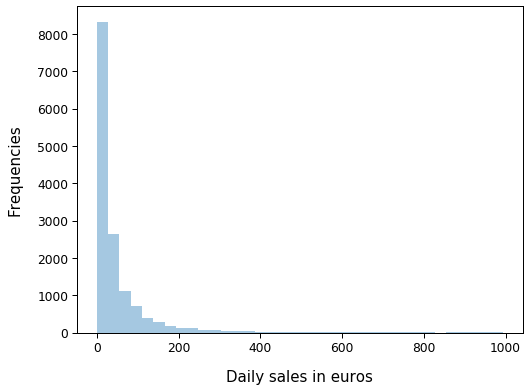

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df2.daily_sales_in_euros, rug = False, hist= True, 
             kde= False, norm_hist= False, bins=int(180/5) )
plt.xlabel('Daily sales in euros',fontsize = 15,color='black',labelpad=15)
plt.ylabel('Frequencies',fontsize = 15,color='black',labelpad=15)

<b>Figure5: </b> Frequency distribution of daily sales in euros

The most common transformation in business and economics is the logarithm, which can be used only on positive numbers. Using the logarithm often transforms skewness into symmetry because it stretches the scale near zero, spreading out all of the small values, which had been bunched together. It also pulls together the very large data values, which had been thinly spread out at the high end. Both types of logarithms (base 10 “common logs” and base e “natural logs”) work equally well for this purpose.

To give more visibility,I used a logarithmic scale of base 10 to make the distribution more distinct. Obviously, there are many products which don't have huge amounts in sales but there is also a long tail that indicates that there are products which have very high amounts of sales.

Text(0, 0.5, 'Probability Density')

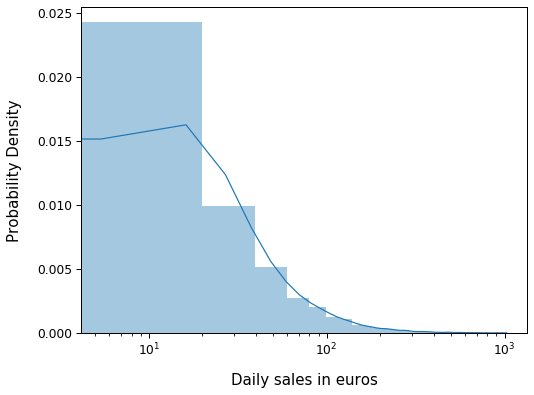

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(df2['daily_sales_in_euros'])
plt.xscale('log')
plt.xlabel('Daily sales in euros',fontsize = 15,color='black',labelpad=15)
plt.ylabel('Probability Density',fontsize = 15,color='black',labelpad=15)

<b>Figure6: </b> Probability Density Distribution of Daily Sales in euros in a logaritmic scale

<b>Is there any distribution that characterizes our variable (daily sales in euros)?<b>

In some cases, a data sample may not resemble a common probability distribution(mostly normal) or cannot be easily made to fit the distribution. 
<br>
As can be seen in the graph below, the conditions of the <b>lognormal</b> distribution is most likely to match those of the variable because:
<br>
1- The lognormal distribution is widely used in situations where values are positively skewed with most of the values near the lower limit.
<br>
2- The uncertain variable can increase without limits but cannot fall below zero.
<br>
3- The natural logarithm of the uncertain variable yields a normal distribution [1].
<br>
Therefore, I have fitted the lognorm distribution into the plot and it is very likely that our data takes this distribution.

Text(0, 0.5, 'probability density')

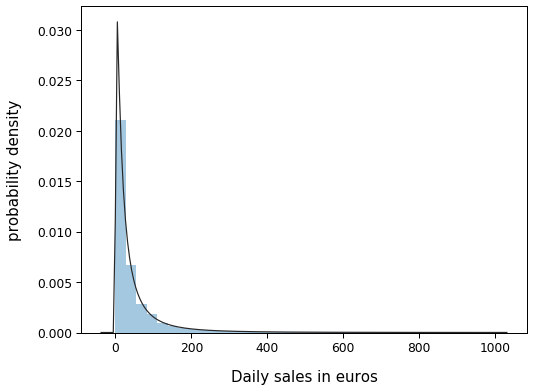

In [35]:
from scipy.stats import norm
plt.figure(figsize=(8,6))
ax = sns.distplot(df2['daily_sales_in_euros'], fit=stats.lognorm,
                  kde=False, bins=int(180/5))
plt.xlabel('Daily sales in euros',fontsize = 15,color='black',labelpad=15)
plt.ylabel('probability density',fontsize = 15,color='black',labelpad=15)

<b>Figure7: </b> Probability density distribution of daily sales in euros fitted with lognorm distribution

<b>How can the skewness in this distribution be explained?<b>

Real data can have extreme values!
<br>
As can be seen in Figure7, the very high bar at the left represents the majority of sales, falls in the range of  less than €100. The bars to the right represent the (relatively few) sales that are larger. As a result of a positively skewed distribution, we have a right-tailed distribution in sales.
<br>
Generally,a skewed distribution is neither symmetric nor normal because the data values trail off more sharply on one side than on the other. In business, skewness is often found in data sets that represent values using positive numbers (eg, sales or stock). The reason is that data values cannot be less than zero (imposing a boundary on one side) but are not restricted by a definite upper boundary. The result is that there are many data values concentrated near zero, and they become systematically fewer and fewer as you move to the right in the histogram.

#### How are the values spread out in different main product categories based on the freshness criterion?

As Figure8 represents, all of the main product group categories are positively skewed because we have got more observations between Q1 and Q2 and Q3-Q2 is greater than Q2-Q1 in all boxplots. 
<br>
The most condenced box belongs to the ACM BACKWAREN from Fresh category which means the observations have less variation and are more consistent while the category ACM FLEISCH has the highest range and high variation in data. Also, it can be seen than 25% of the observed data in category ACM FLEISCH have higher sales price than the maximum amount of all other categories except the ACM FRISCHFISCH.
<br>
Moreover, the maximum values of all product group categories in fresh section have lower sales amount than the 25% of upper level values in ACM FLEISCH category.
<br>
In addition, the interquartile range of all product categories show that the spread of sales values in all main product group categories are below 100€ except for ACM FLEISCH.

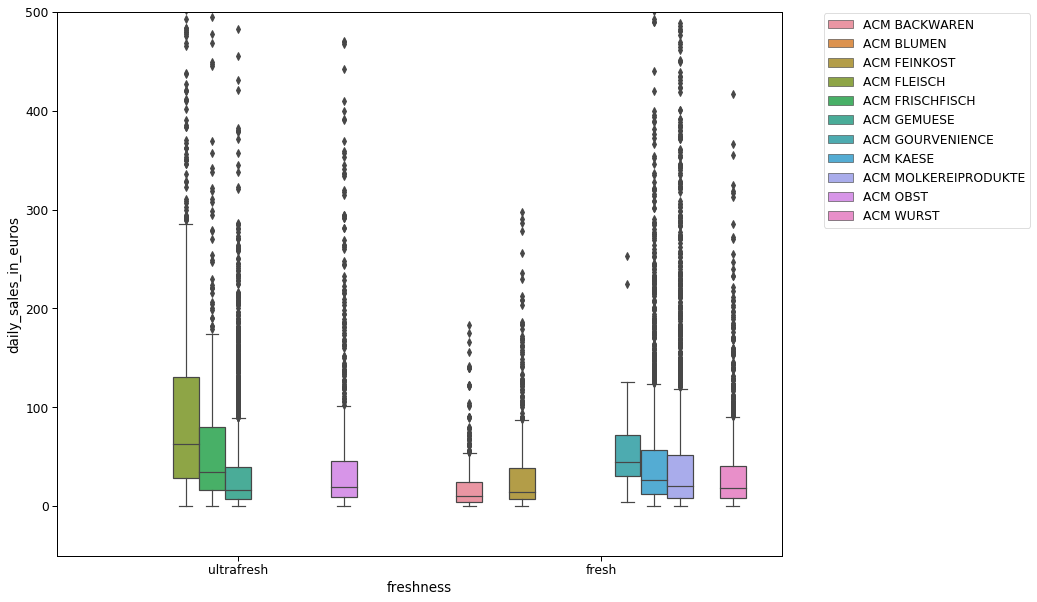

In [36]:
plt.figure(figsize=(13,10))
ax= sns.boxplot(x = df2['freshness'], y = df2["daily_sales_in_euros"], hue= df2["main_product_category"])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["ACM WURST", "ACM OBST", "ACM MOLKENPRODUKTE", "ACM KAESE",
                    "ACM GOURVENIENCE", "ACM GEMUESE", "ACM FRISCHFISCH",
                    "ACM FLEISCH", "ACM FEINKOST", "ACM BLUMEN", "ACM BACKWAREN"])
plt.ylim(-50,500)
ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.8), ncol=1)
plt.show()

<b>Figure8: </b> The spread of daily sales in euros values in different main product categories based on the freshness criterion

<b>What kind of measures can give a more realistic picture of the data distribution in a skewed distribution? Mean, Median or Mode?<b>

The median is a better measure of central tendency in skewed distributions and it gives a more realistic picture of the data distribution since the outliers don’t have such an effect on the median and the mean is pulled toward the skew.
<br>
On a right-skewed histogram, the mean, median, and mode are all different. In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak).
<br>
Also, data skewed to the right is usually a result of a lower boundary in a data set (whereas data skewed to the left is a result of a higher boundary). So if the data set's lower bounds are extremely low relative to the rest of the data, this will cause the data to skew right [2].
<br>

On a right-skewed histogram the mean, median, and mode are all different. As can be seen below, in a positively skewed distribution : 
<br>
<b> Mean > Median > Mode</b> [2]
<br>

In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak).

In [37]:
df2.loc[:,"daily_sales_in_euros"].mean()

49.161131142957004

In [38]:
df2.loc[:,"daily_sales_in_euros"].median()

21.0

In [39]:
df2.loc[:,"daily_sales_in_euros"].mode()

0    5.0
dtype: float64

<b>What can Variance tell us about the sales data distribution?<b>

It is possible for SD to be greater than the mean, this is common in the case of over-dispersed count data when the variance is greater than the mean.
<br>
Having SD greater than mean tells us that the dataset is heterogeneous and uncorrelated which needs to be treated either by transforming it or by applying non parametric statistics to get a true picture of what is going on.

In [40]:
df2.loc[:,"daily_sales_in_euros"].var()

7288.8190867867725

In [41]:
df2.loc[:,"daily_sales_in_euros"].std()

85.37458103432644

#### Kernel Density Estimation for Sales in Different Main Product Categories

It is useful to know the probability density function for a sample of data in order to know whether a given observation is unlikely, or so unlikely as to be considered an outlier or anomaly and whether it should be removed.
<br>
Since the Kernel density estimation(KDE) is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable, it does not assume any underlying distribution for the variable [3].

Let's figure out how the kde plots look like for daily sales in euors in main product group categories. Please note that ACM BLUMEN has no sales records.

Text(24.398856460243067, 0.5, 'Probability Density')

<Figure size 1800x1440 with 0 Axes>

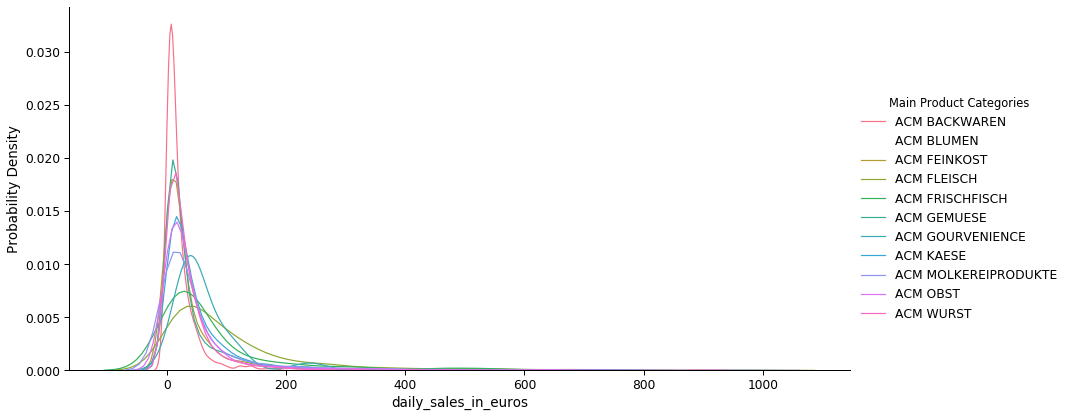

In [42]:
plt.figure(figsize=(25,20))
g = sns.FacetGrid(data=df2, hue='main_product_category', aspect=2, height=6)
g.map(sns.kdeplot, 'daily_sales_in_euros', shade=False)
g.add_legend(title='Main Product Categories')
plt.ylabel('Probability Density')

<b>Figure9: </b> Kernel density estimation plot for daily sales in euros in different main product categories

The area under each curve will indicate the interval in which every variable will fall. The total area in this interval of the graph equals the probability of the occurance of a variable.
<br>
As can be seen, in the ACM BACKWAREN group the values are more concentrated around the 0 to 50 euros interval while in categories such as ACM FLEISCH or ACM FRISCHFISCH, sales amounts are concentrated more in the 50 to 100 euros interval and they are skewed to the right.  

The Table 6 shows the maximum sales values in each category. As can be seen the categories such as ACM MOLKEREIPRODUKTE, ACM FLEISCH & ACM WURST have the most outliers which makes the right tails of the curves very long.

In [43]:
df3= df2.groupby("main_product_category")["daily_sales_in_euros"].max().sort_values(ascending=False).reset_index()
df3.head()

,main_product_category,daily_sales_in_euros
0,ACM MOLKEREIPRODUKTE,993.0
1,ACM FLEISCH,989.0
2,ACM WURST,910.0
3,ACM GEMUESE,815.0
4,ACM KAESE,748.0


<b>Table6:</b> Maximum values of daily sales in euros in main product categories

Figure10 gives more visibility about the kde plots of top 5 categories with highest daily sales in euros values.

Text(22.317737836718734, 0.5, 'Probability Density')

<Figure size 1080x720 with 0 Axes>

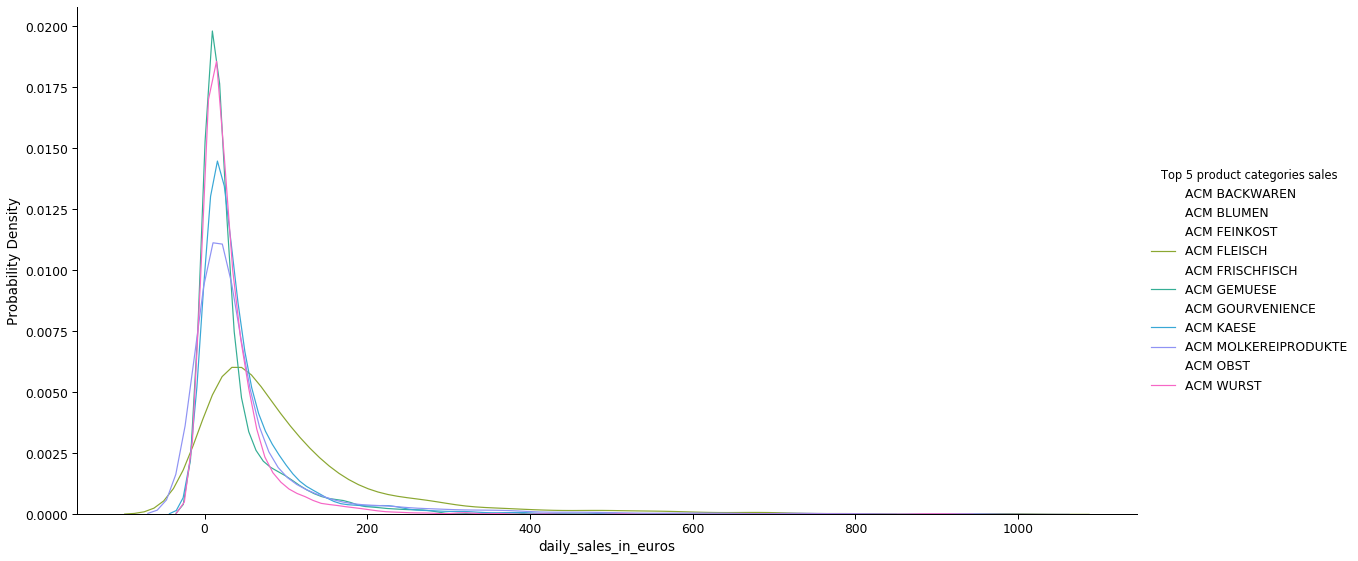

In [44]:
product_categories = ['ACM MOLKEREIPRODUKTE', 'ACM KAESE', 'ACM FLEISCH', 'ACM GEMUESE', 'ACM WURST']
plt.figure(figsize=(15,10))
g = sns.FacetGrid(
    data=df2[(df2['main_product_category'] != '0') & (df2['main_product_category'].isin(product_categories))], 
    hue='main_product_category', 
    aspect=2, 
    height=8)
g.map(sns.kdeplot,'daily_sales_in_euros', shade=False)
g.add_legend(title='Top 5 product categories sales')
plt.ylabel('Probability Density')

<b>Figure10: </b> Kernel density estimation plot for Top 5 main product categories daily sales in euros 

Also, Figure11 depicts that on Fridays the sales values are mostly condenced in the amount range of 0 to 50 euros while the Monday & Tuesday sales are skewed more to the higher price ranges. However, most of the days the sales are more spread out among values between 0 to 100 rather than larger values.

(-100, 400)

<Figure size 1800x1440 with 0 Axes>

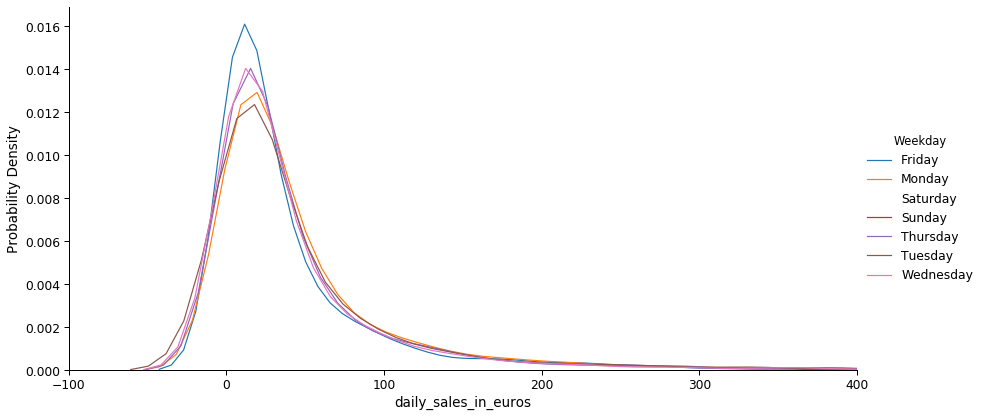

In [45]:
plt.figure(figsize=(25,20))
g = sns.FacetGrid(data=df2, hue='weekday', aspect=2, height=6)
g.map(sns.kdeplot,'daily_sales_in_euros', shade=False)
g.add_legend(title='Weekday')
plt.ylabel('Probability Density')
plt.xlim(-100,400)

<b>Figure11: </b> Kernel density estimation plot for daily sales in euros in various weekdays 

#### Is there any correlation between daily sales and shrinkage in euros in our dataset?

Now that we have explored daily sales in euros feature across all main product categories, let's try to find if there is any correlation between the changes in sales with an important column in our dataset "daily shrinkage in euros".

#### Pearson's Correlation

As the Pearson's correlation coefficient calculation & Figure12 below show, there is almost no linear relationship between daily sales and daily shrinkage in euros. Infact, the Pearson's correlation coefficient (0.03) is so close to 0 that we can say there is no positive correlation between them.

Text(22.075000000000003, 0.5, 'daily sales [€]')

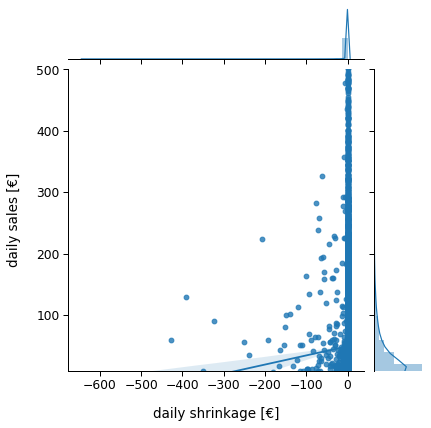

In [46]:
g = sns.jointplot("daily_shrinkage_in_euros", "daily_sales_in_euros", data=df2, kind="reg")
plt.ylim(10, 500)
plt.xlabel("daily shrinkage [€]", labelpad=15)
plt.ylabel("daily sales [€]", labelpad=15)

<b>Figure12: </b> Linear correlation between daily sales & shrinkage in euros

In [47]:
round(stats.pearsonr(df2['daily_shrinkage_in_euros'], df2['daily_sales_in_euros'])[0], 2)

0.03

In [48]:
df2[['daily_shrinkage_in_euros', 'daily_sales_in_euros']].corr()

,daily_shrinkage_in_euros,daily_sales_in_euros
daily_shrinkage_in_euros,1.000000,0.025202
daily_sales_in_euros,0.025202,1.000000


<b>Table7:</b> Pearson's correlation coefficient for daily sales & shrinkage in euros

#### Spearman Correlation

The Spearman correlation does not assume that the variables are normally distributed.  A Spearman correlation analysis can therefore be used in many cases in which the assumptions of the Pearson correlation (continuous-level variables, linearity and normality) are not met.
<br>
Let's calculate the spearman correlation coeeficient below.

(10, 500)

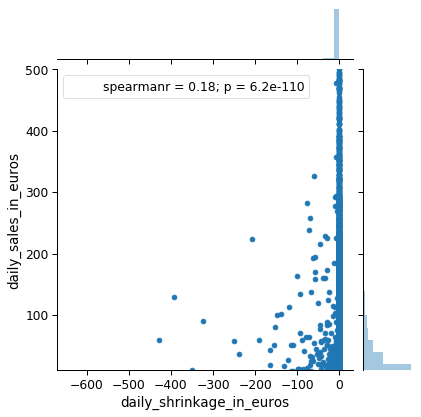

In [49]:
from scipy.stats import spearmanr
g= sns.jointplot("daily_shrinkage_in_euros", "daily_sales_in_euros", data=df2,
                 stat_func=spearmanr)
plt.ylim(10, 500)

<b>Figure13: </b> Spearman correlation between daily sales & shrinkage in euros

As can be seen, S > P and it means that we have a correlation that is monotonic but not linear. However, the value of 0.18 is also implies a very weak correlation between sales and shrinkage.

### Results

To put every findings in a nutshell, as Figure7 and Figure9 show all of the main product group categories are positively skewed to the right and the categories such as ACM MOLKEREIPRODUKTE, ACM FLEISCH & ACM WURST have the most outliers which makes the right tails of the curves very long. Further, Figure8 revealed that 25% of the observed data in category ACM FLEISCH has higher sales price than the maximum amount of all other categories except the ACM FRISCHFISCH. This fact is also depicted in Figure9 where we saw that for ACM FLEISCH & ACM FRISCHFISCH, the sales data is concentrated more in the 50 to 100 euros interval.
<br>
As the trends show in Figure2 and confirmed by Figure3, it can be predicted that the sales goes down on Fridays and increases on Mondays in the following weeks. Furthermore, Figure 4 depicts that Fridays have the highest amount of shrinkage while Mondays have the least amount of shrinkage.
<br>
Figure1 represents that fresh products have more shares in total amount of shrinkage & sales than ultrafresh ones.
<br>
Moreover, the Pearson correlation coefficient in Table7 and the jointplot in  Figure12 revealed that there is no linear correlation between shrinkage and sales. However, from the Spearman correlation in Figure13, it can be said that there is a very weak monotonic correlation between sales & shrinkage.

### Conclusion & Outlook

All in all,the ultimate goal of this report is to give a true & fair view of the dataset and by considering the high amounts of limitations, it can be concluded that :
<br>
1- The fact that real data have extreme values will affect statistical analyses a lot. In business, skewness is often found in data sets that represent values using positive numbers (eg, sales or stock). The reason is that data values cannot be less than zero (imposing a boundary on one side) but are not restricted by a definite upper boundary.
<br>
2- Based on the fact that Fridays have the most shrinkage and Mondays have the highest sales, the company can make proper decisions in restocking and giving offers to the customers. However, there are a lot of factors which can affect supply and demand and predictive decisions in this field. 
<br>
Nonetheless, if we had more reliable and enough data from shrinkage we could have get to a better conclusion and analyses for shrinkage and its effects on other values.
<br>
For further studies and if the company wants to focus on shrinkage management, it is necessary to record shrinkage data more precisely to make the analyses well grounded.

### Reference

#### Data Science Libraries & Documentations
[1] Johnathan Mun. 2008. Advanced Analytical Models: Over 800 Models and 300 Applications from the Basel II Accord to Wall Street and Beyond (Wiley Finance). Wiley Publishing.
<br>
[2] Andrew F. Siegel. 2016. Chapter 3 - Histograms: Looking at the Distribution of Data, Practical Business Statistics (Seventh Edition), Academic Press.
<br>
[3] Jason Brownlee. "A Gentle Introduction to Probability Density Estimation" Accessed 10 April 2020. https://machinelearningmastery.com/probability-density-estimation/
<br>
[4] Pandas - Provides data structures and data analysis tools: https://pandas.pydata.org/docs/
<br>
[5] SciPy - Ecosystem of libraries useful for math, science, engineering needs: https://docs.scipy.org/doc/
<br>
[6] Numpy - Scientific computing tools : https://numpy.org/doc/stable/
<br>
[7] Seaborn - Data visualization : https://seaborn.pydata.org/
<br>
[8] Matplotlib - Data visualisation : https://matplotlib.org/3.2.1/contents.html
<br>
